# Simulating MIMIC Patient
We used Pulse to simulate patients in MIMIC, initializing them using their readings in MIMIC, and administering IV fluids and vasopressors at each time step as done in MIMIC. (See [MIMICSimulator.py](https://gitlab.kitware.com/faaizT/engine/-/blob/local-changes/src/python/pulse/rlengine/SimulationEngine.py) for more details about the simulations.)  
This note compares a patient in MIMIC with their simulated counterpart. 

In [1]:
import pandas as pd
icustayid = 34541.0
export_dir = "/data/localhost/taufiq/export-dir/"
mimic_csv = "/data/localhost/taufiq/Pulse/engine/src/python/pulse/rlengine/resources/MIMICtable-1hourly_entire-stay.csv"

In [2]:
simulation = pd.read_csv(export_dir + "simulation_" + str(icustayid) + "_final_1613253679.csv")
simulation = simulation.replace(r"[\[|\]]", "", regex=True)

In [3]:
simulation.head()

,ArterialPressure (mmHg),BloodVolume (mL),Carina - CarbonDioxide - PartialPressure (mmHg),CoreTemperature (degC),DiastolicArterialPressure (mmHg),EndTidalCarbonDioxidePressure (mmHg),HeartRate (1/min),Lead3ElectricPotential (mV),MeanArterialPressure (mmHg),OxygenSaturation (None),RespirationRate (1/min),SimulationTime(s),SystolicArterialPressure (mmHg),time
0,64.29129323913278,6630.004709562064,0.33084171684761815,37.00816781954296,60.371984092468914,33.31863133739734,107.14285714285711,-0.07449999999999998,79.22133043199405,0.973764148513535,19.8675496688742,0.0,95.49996962243978,7.271906e+09
1,95.91593191365696,7075.744361129683,5.5879000235912715,37.29885558934376,58.53352968448597,33.654332345076284,96.77419354838706,0.1830000000000005,79.58206575236056,0.9735156011857755,20.40816326530615,10800.000000142898,98.5682949480001,7.271916e+09
2,57.60389111723216,7198.524011458321,26.408805438936845,37.30125199386271,57.501902469128254,33.66905283224869,93.74999999999996,-0.0369999999999997,79.22456945402823,0.9734937769745957,20.40816326530615,14400.000000221478,98.8415229074554,7.271920e+09
3,71.2095501611617,7311.307671347868,13.35042020565441,37.301806300897056,56.87239641712278,33.671747554120834,90.90909090909086,-0.018000000000000127,79.640428355305,0.9735277638787535,20.40816326530615,18000.000000300057,100.1881318383053,7.271924e+09
4,54.686118985051074,9843.529403987628,33.79641152429897,37.266697960315014,44.19421194318981,33.68812375353436,58.823529411764675,-0.018000000000000127,82.48224017106101,0.9737043970030456,20.134228187919494,21600.000000378637,120.78802755840675,7.271927e+09


In [4]:
len(simulation)

51

In [5]:
MIMICtable = pd.read_csv(mimic_csv)
MIMICtable.head()


,bloc,icustay_id,charttime,gender,age,elixhauser,re_admission,died_in_hosp,died_within_48h_of_out_time,mortality_90d,...,Shock_Index,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_1hourly,output_total,output_1hourly,cumulated_balance,sepsis
0,1.0,1006.0,4.330306e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.750000,206.000000,0.0,0.0,0.0,0.0,8166.0,4083.0,-8166.0,1.0
1,11.0,1006.0,4.330342e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.750000,206.000000,0.0,0.0,0.0,0.0,12249.0,4083.0,-12249.0,1.0
2,21.0,1006.0,4.330378e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.831461,240.000000,0.0,0.0,0.0,0.0,16332.0,4083.0,-16332.0,1.0
3,22.0,1006.0,4.330382e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.955357,96.000000,0.0,0.0,0.0,0.0,20415.0,4083.0,-20415.0,1.0
4,23.0,1006.0,4.330385e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.812749,109.714286,0.0,0.0,175.0,175.0,24298.0,3883.0,-24123.0,1.0


In [6]:
MIMICtable_filtered = MIMICtable[MIMICtable['icustay_id']==icustayid]
len(MIMICtable_filtered)

51

In [7]:
MIMICtable_filtered.head()

,bloc,icustay_id,charttime,gender,age,elixhauser,re_admission,died_in_hosp,died_within_48h_of_out_time,mortality_90d,...,Shock_Index,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_1hourly,output_total,output_1hourly,cumulated_balance,sepsis
972,1.0,34541.0,7.271906e+09,0.0,23326.676875,3.0,1.0,0.0,0.0,0.0,...,1.046875,96.000000,0.0,0.0,0.0,0.0,9300.0,4650.0,-9300.0,1.0
973,4.0,34541.0,7.271916e+09,0.0,23326.676875,3.0,1.0,0.0,0.0,0.0,...,0.920139,154.166667,0.0,0.0,0.0,0.0,13950.0,4650.0,-13950.0,1.0
974,5.0,34541.0,7.271920e+09,0.0,23326.676875,3.0,1.0,0.0,0.0,0.0,...,0.900049,200.000000,0.0,0.0,0.0,0.0,18600.0,4650.0,-18600.0,1.0
975,6.0,34541.0,7.271924e+09,0.0,23326.676875,3.0,1.0,0.0,0.0,0.0,...,0.831461,240.000000,0.0,0.0,2500.0,2500.0,23250.0,4650.0,-20750.0,1.0
976,7.0,34541.0,7.271927e+09,0.0,23326.676875,3.0,1.0,0.0,0.0,0.0,...,0.772277,192.000000,0.0,0.0,2500.0,0.0,27900.0,4650.0,-25400.0,1.0


In [8]:
time = MIMICtable_filtered['charttime']
diaBP_pulse = simulation['DiastolicArterialPressure (mmHg)']
diaBP_mimic = MIMICtable_filtered['DiaBP']

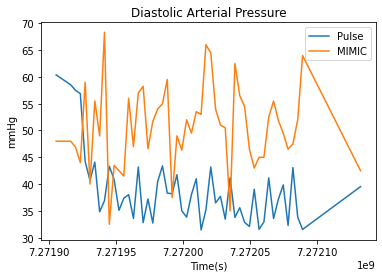

In [9]:
import matplotlib.pyplot as plt
plt.plot(time, pd.to_numeric(diaBP_pulse))
plt.plot(time, diaBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Diastolic Arterial Pressure')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

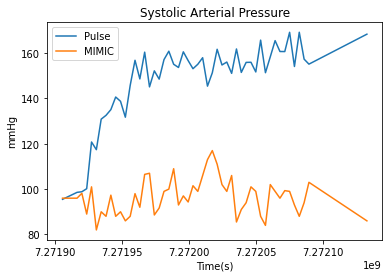

In [10]:
sysBP_pulse = simulation['SystolicArterialPressure (mmHg)']
sysBP_mimic = MIMICtable_filtered['SysBP']
plt.plot(time, pd.to_numeric(sysBP_pulse))
plt.plot(time, sysBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Systolic Arterial Pressure')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

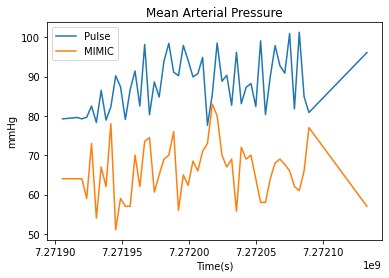

In [11]:
meanBP_pulse = simulation['MeanArterialPressure (mmHg)']
meanBP_mimic = MIMICtable_filtered['MeanBP']
plt.plot(time, pd.to_numeric(meanBP_pulse))
plt.plot(time, meanBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Mean Arterial Pressure')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

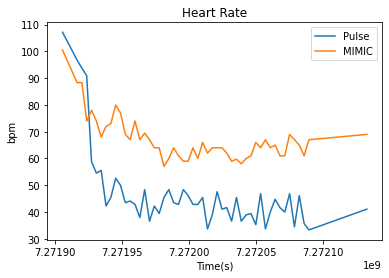

In [12]:
HR_pulse = simulation['HeartRate (1/min)']
HR_mimic = MIMICtable_filtered['HR']
plt.plot(time, pd.to_numeric(HR_pulse))
plt.plot(time, HR_mimic)
plt.xlabel('Time(s)')
plt.ylabel('bpm')
plt.title('Heart Rate')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

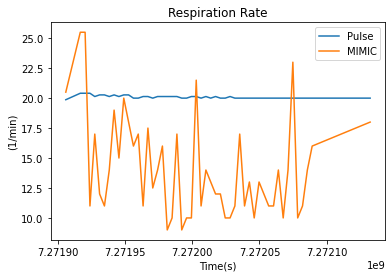

In [13]:
RR_pulse = simulation['RespirationRate (1/min)']
RR_mimic = MIMICtable_filtered['RR']
plt.plot(time, pd.to_numeric(RR_pulse))
plt.plot(time, RR_mimic)
plt.xlabel('Time(s)')
plt.ylabel('(1/min)')
plt.title('Respiration Rate')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

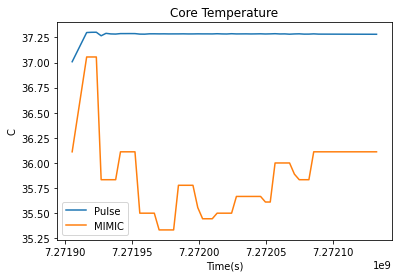

In [14]:
temp_pulse = simulation['CoreTemperature (degC)']
temp_mimic = MIMICtable_filtered['Temp_C']
plt.plot(time, pd.to_numeric(temp_pulse))
plt.plot(time, temp_mimic)
plt.xlabel('Time(s)')
plt.ylabel('C')
plt.title('Core Temperature')
plt.legend(['Pulse', 'MIMIC'])
plt.show()